In [1]:
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

path = "C:/Windows/Fonts/malgun.ttf"
font_name = mpl.font_manager.FontProperties(fname=path).get_name()

mpl.rc("font", family=font_name)

# plt.style.use("dark_background")

pd.set_option("mode.chained_assignment",  None)

In [3]:
raw_data = pd.read_csv("D:/디지털혁신팀/커뮤니케이션 분석/hdc_messenger.csv", index_col=0)
hr = pd.read_csv("D:/디지털혁신팀/협업플랫폼 분석/사용자권한정보_20201021.csv", index_col=0)

In [4]:
hr["name"] = hr["부서명"] + "\n" + hr["성명"]
hr = hr[["name", "E-MAIL"]]
hr = hr.reset_index(drop=True)
hr = hr.dropna()

data = raw_data

data = data[data["Sender"].str.contains("dvp")]

data = pd.merge(data, hr, left_on="Sender", right_on="E-MAIL")
data["Sender"] = data["name"]
data = data[["Sender", "Receiver", "Count"]]

data = pd.merge(data, hr, left_on="Receiver", right_on="E-MAIL")
data["Receiver"] = data["name"]
data = data[["Sender", "Receiver", "Count"]]

In [6]:
# data.to_csv("D:/hdc_messenger_matching.csv", encoding="euc-kr")

In [7]:
data = data[data["Sender"]!=data["Receiver"]]
data = data.drop_duplicates()

In [8]:
data.head()

,Sender,Receiver,Count
0,당진아이파크\n권혁진,영통아이파크캐슬3단지\n주현진,2
1,신정뉴타운아이파크위브\n권혁진,영통아이파크캐슬3단지\n주현진,2
2,전주태평아이파크\n이혜진,영통아이파크캐슬3단지\n주현진,4
3,건설기획팀\n이정상,영통아이파크캐슬3단지\n주현진,1
4,투자사업팀\n임기동,영통아이파크캐슬3단지\n주현진,11


In [9]:
data.sort_values(by="Count", ascending=False).head(30)

,Sender,Receiver,Count
31018,HR팀\n조나영,주택개발팀\n김현아,30715
1087,고객서비스팀\n위현정,일반견적팀\n김준영,27841
20828,일반견적팀\n김준영,고객서비스팀\n위현정,27037
18843,설계팀\n김신혜,상품설계팀\n김신혜,25950
18842,상품설계팀\n김신혜,설계팀\n김신혜,25950
4819,주택개발팀\n김현아,HR팀\n조나영,22910
37000,주택수주팀\n정성희,주택수주팀\n이수지,20887
41900,고객서비스팀(운영사업소)\n이혜민,고객서비스팀(운영사업소)\n정수정,18123
37258,고객서비스팀\n송나린,고객서비스팀\n장남희,18094
37762,주택수주팀\n이수지,주택수주팀\n정성희,18082


In [10]:
gby = data.groupby(["Sender"]).sum().sort_values(by="Count", ascending=True)

In [11]:
gby[gby.index.str.contains("팀")].head(30)

,Count
Sender,
법무감사팀\n김수정,1
도시정비수주팀(도시개발2사업소)\n임채환,1
도시정비수주팀\n나성근,1
도시정비사업팀(대구사업소)\n김한수,1
도시정비사업팀(강북사업소)\n박명주,1
도시정비사업팀\n문치성,1
도시개발팀\n김태수,1
건축수주팀\n조영택,1
주택수주팀\n이수정,1


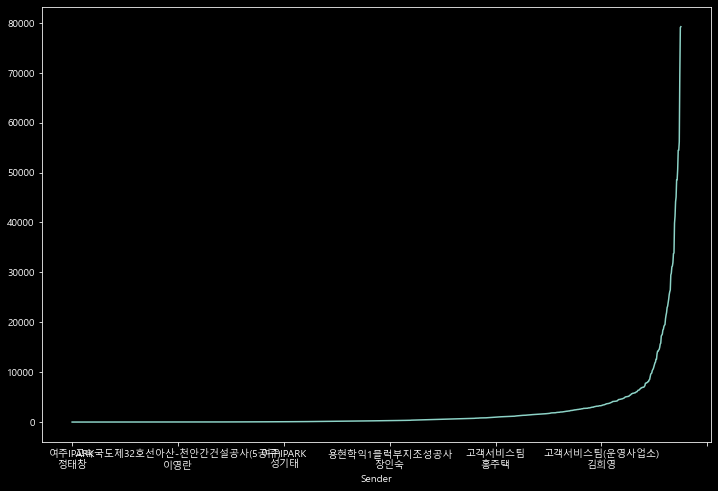

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))

gby["Count"].plot()

In [13]:
data["Count"] = data["Count"] / 10

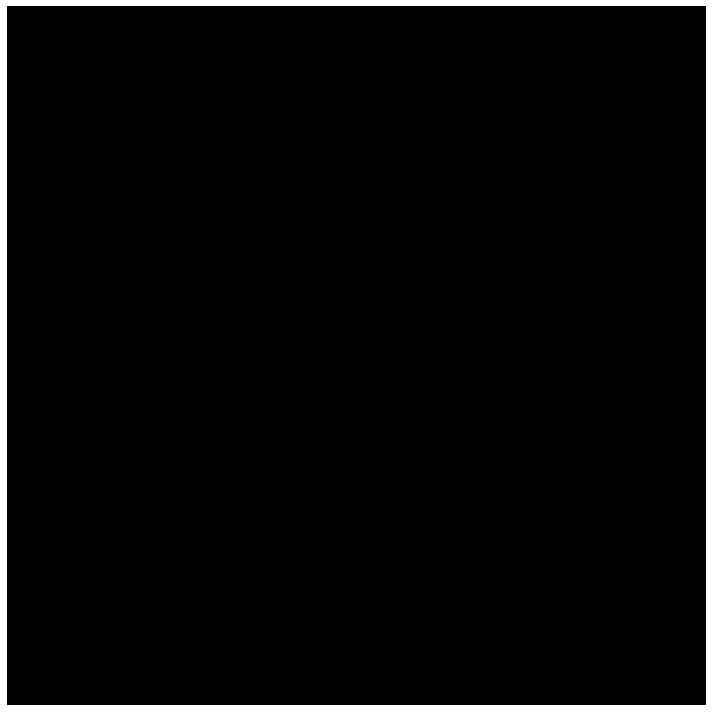

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))

g = nx.DiGraph()

for node in (set(data["Sender"]) | set(data["Receiver"])):
    g.add_node(node)
for _, row in data.iterrows():
    g.add_edge(row["Sender"], row["Receiver"], weight=row["Count"])

weights = [cnt["weight"] for (_, _, cnt) in g.edges(data=True)]
    
nx.draw_shell(g, with_labels=False)

pos = nx.circular_layout(g)

nx.draw_networkx_nodes(g, pos, node_size=10)
nx.draw_networkx_edges(g, pos, width=weights)
nx.draw_networkx_labels(g, pos, font_family=font_name, font_size=11)

fig.tight_layout()

# fig.savefig("D:/☆디지털혁신팀/☆실거래가 분석/☆그래프/communication_graph_201105.png")